In [6]:
import sys

sys.path.append("../../")
sys.path.append("/home/ferroelectric/m3_learning/m3_learning/src")

In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz, get_lowest_loss_for_noise_level
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2023-05-23 10:33:23.190840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 10:33:23.328106: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-23 10:33:23.810942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/anaconda3/envs/rapidfitting/lib/python3.9/site-packages/cv2/../../lib64:
2023-05-23 10:33:23.810994: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


In [3]:
# Specify the filename and the path to save the file
filename = "data_raw_SHO.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins=None, SHO_fit_func_NN=SHO_fit_func_nn)

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

## Noisy Data Viewer


In [5]:
BE_viz = Viz(dataset, printing, verbose=True)

./Figures/Noise test.png
./Figures/Noise test.svg


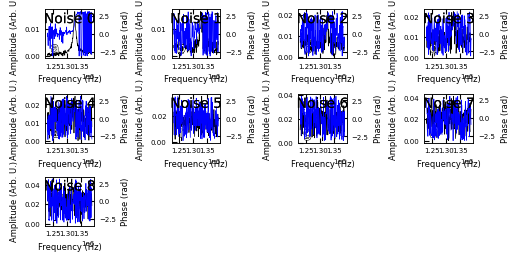

In [7]:
state = {
    "fitter": "LSQF",
    "raw_format": "magnitude spectrum",
    "resampled": True,
    "scaled": True,
    "output_shape": "pixels",
}

BE_viz.noisy_datasets(state, filename = "Noise test")

## Noise Free Data

### Finds the Best Model

In [10]:
path = "./Trained Models/SHO Fitter/5_20_SpeedTestTraining_Noisy/"

model_name = get_lowest_loss_for_noise_level(path, 0)

### Calculate the MSE error

We can calculate the MSE error for the training, test, and entire data set.


In [ ]:
X_data, Y_data = dataset.NN_data()
LSQF_ = {'resampled': True,
                'raw_format': 'complex',
                'fitter': 'LSQF',
                'scaled': True,
                'output_shape': 'index',
                'measurement_state': 'all',
                'resampled_bins': 165,
                'LSQF_phase_shift': np.pi / 2,
                'NN_phase_shift': np.pi / 2,
                'noise': 0}

data = (LSQF_, X_data, X_test, X_train)
labels = ["LSQF", "Full Data", "Test Data", "Train Data"]

model.print_mse(data, labels)


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = None
    Noise Level = 0
                  
None
LSQF Mean Squared Error: 0.0345
Full Data Mean Squared Error: 0.0340
Test Data Mean Squared Error: 0.0340
Train Data Mean Squared Error: 0.0341


## Comparison SHO and Neural Network Fits

3 graphs, best, median, worst

histograms of parameters.



    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = 1.5707963267948966
    NN Phase Shift = 1.5707963267948966
    Noise Level = 

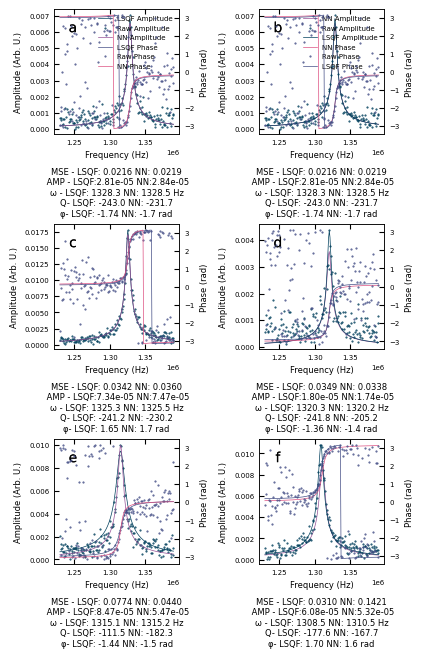

In [ ]:
dataset.NN_phase_shift = np.pi/2
dataset.LSQF_phase_shift = np.pi/2
dataset.measurement_state = "all"


true_state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
    "output_shape": "index",
    "measurement_state": "all",
}

out_state = {"scaled": True, "raw_format": "magnitude spectrum"}

n = 1

LSQF = BE_viz.get_best_median_worst(
    true_state,
    prediction={"fitter": "LSQF"},
    out_state=out_state,
    SHO_results=True,
    n=n,
)

NN = BE_viz.get_best_median_worst(
    true_state, prediction=model, out_state=out_state, SHO_results=True, n=n
)

data = (LSQF, NN)
names = ["LSQF", "NN"]

BE_viz.SHO_Fit_comparison(
    data,
    names,
    model_comparison=[model, {"fitter": "LSQF"}],
    out_state=out_state,
    filename="Figure_14_LSQF_NN_bmw_comparison",
    # display_results = None
)

### Statistics of the Results for Training, Validation, and Entire Dataset


./Figures/Figure_16_Violin.png
./Figures/Figure_16_Violin.svg


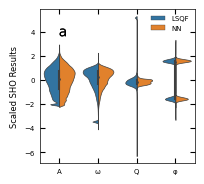

In [ ]:
true_state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
    "output_shape": "index",
    "measurement_state": "all",
}


BE_viz.violin_plot_comparison(true_state, model, X_data, filename="Figure_16_Violin") 


./Figures/Figure_15_NN_Switching_Maps.png
./Figures/Figure_15_NN_Switching_Maps.svg


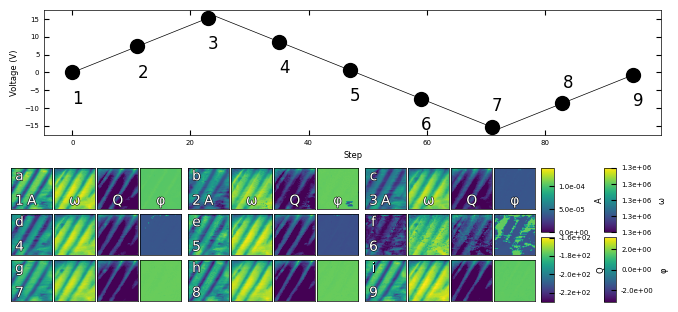

In [ ]:
# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = model.predict(X_data)

BE_viz.SHO_switching_maps(parm, filename="Figure_15_NN_Switching_Maps")

./Figures/Figure_15_NN_Switching_Maps.png
./Figures/Figure_15_NN_Switching_Maps.svg


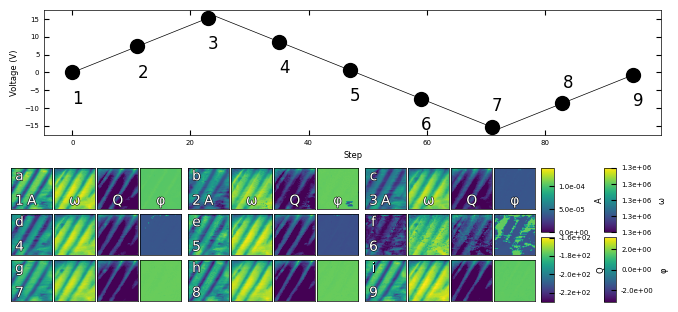

In [ ]:
# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = model.predict(X_data)

BE_viz.SHO_switching_maps(parm, filename="Figure_15_NN_Switching_Maps")

In [54]:
def viz_noise_hist(path, noise_level):

    # instantiate the model
    model = SHO_Model(dataset, training=False, model_basename="SHO_Fitter_original_data")

    filename = path + '/' + get_lowest_loss_for_noise_level(path, noise_level)

    model.load(filename)

    # we will add the appropriate phase shift to the dataset based on the fix seed,
    # If your seed is different the results might vary
    dataset.NN_phase_shift = np.pi/2 
    dataset.noise = noise_level

    X_data, Y_data = dataset.NN_data()

    # you can view the test and training dataset by replacing X_data with X_test or X_train
    pred_data, scaled_param, parm = model.predict(X_data)

    parm = dataset.SHO_scaler.transform(parm)
    

    BE_viz.SHO_hist(parm, filename="Figure_13_NN_Unscaled_Parameters_Histograms")
    BE_viz.SHO_hist(Y_data, filename="Figure_13_NN_Unscaled_Parameters_Histograms")

In [7]:
path = "/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter"

from m3_learning.be.viz import get_lowest_loss_for_noise_level

# instantiate the model
model = SHO_Model(dataset, training=False, model_basename="SHO_Fitter_original_data")

filename = path + '/' + get_lowest_loss_for_noise_level(path, 1)

model.load(filename)

Using GPU NVIDIA GeForce RTX 3090


In [8]:
X_data, Y_data = dataset.NN_data()

# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = model.predict(X_data)


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
None


Using GPU NVIDIA GeForce RTX 3090

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
None

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Res

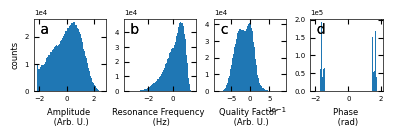

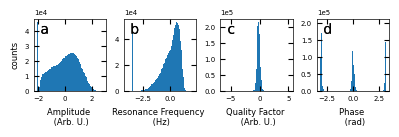

In [55]:
viz_noise_hist(path, 0)

Using GPU NVIDIA GeForce RTX 3090

    Dataset = Noisy_Data_2
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 2
                  
None

    Dataset = Noisy_Data_2
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 2
                  
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg

    Dataset = Noisy_Data_2
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = F

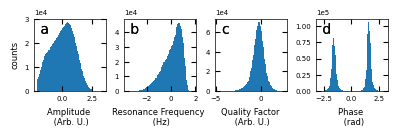

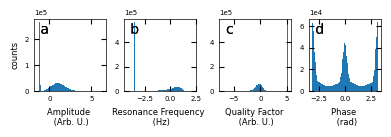

In [56]:
viz_noise_hist(path, 2)

Using GPU NVIDIA GeForce RTX 3090

    Dataset = Noisy_Data_1
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 1
                  
None

    Dataset = Noisy_Data_1
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 1
                  
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg

    Dataset = Noisy_Data_1
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = F

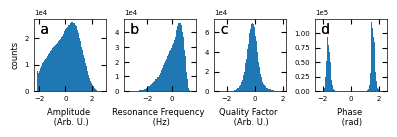

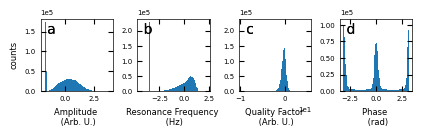

In [57]:
viz_noise_hist(path, 1)

Using GPU NVIDIA GeForce RTX 3090

    Dataset = Noisy_Data_7
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 7
                  
None

    Dataset = Noisy_Data_7
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 7
                  
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg

    Dataset = Noisy_Data_7
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = F

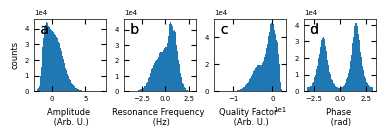

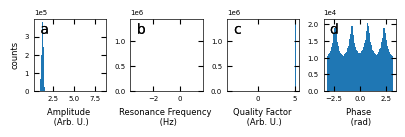

In [20]:
viz_noise_hist(path, 7)

In [21]:
import matplotlib.pyplot as plt
import torch

dataset.noise = 7

X_data, Y_data = dataset.NN_data()


# instantiate the model
model = SHO_Model(dataset, training=False, model_basename="SHO_Fitter_original_data")

filename = path + '/' + get_lowest_loss_for_noise_level(path, 7)

model.load(filename)

# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = model.predict(X_data)

parm = dataset.SHO_scaler.transform(parm)



    Dataset = Noisy_Data_7
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 7
                  
None
Using GPU NVIDIA GeForce RTX 3090


In [27]:
dataset.noise = 0
x_data_true, y = dataset.NN_data()


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = 1.5707963267948966
    Noise Level = 0
                  
None


tensor(29.9069)

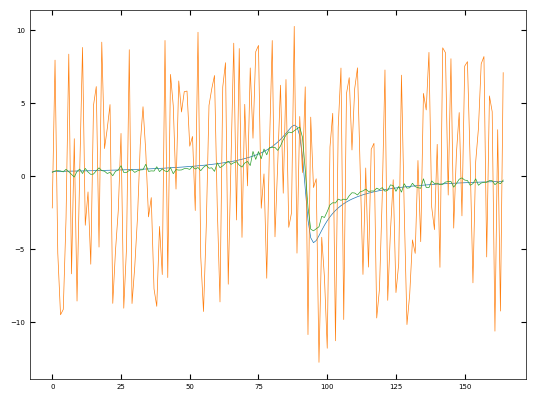

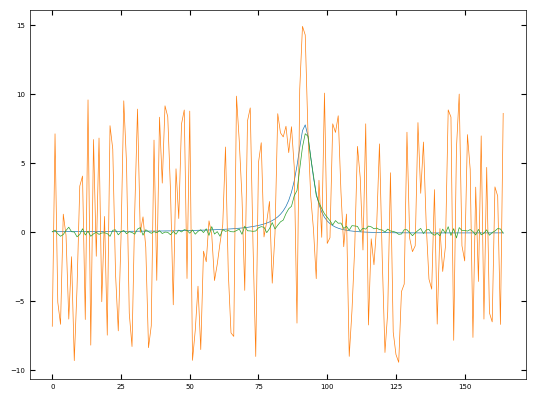

In [42]:


i = np.random.randint(0, 1000000)

plt.plot(pred_data[i,:,0])
plt.plot(X_data[i,:,0])
plt.plot(x_data_true[i,:,0])

plt.figure()
plt.plot(pred_data[i,:,1])
plt.plot(X_data[i,:,1])
plt.plot(x_data_true[i,:,1])

torch.mean((X_data[100,:,0]-pred_data[100,:,0])**2)